# Text Clustering

In [30]:
# <basics>
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.construct import random
# </basics>

# <clustering>
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
# </clustering>

# <cluster vis>
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
import plotly
# </cluster vis>

In [2]:
path = "/Users/ercongluo/Documents/GU/501/501portfolio/datasets/NewsData/"
DF = pd.read_csv(path + "NewsData_cleanedDF.csv")
DF
# drop_labels = ['000','10', '13', '14', '15', '16', '19', '2017', '2018', '2020', '2021', '2030', '22', '27', '2781', '30', '3779']
# onehot_DF.drop(columns = drop_labels)

,Unnamed: 0,source,title,description,content
0,0,TechCrunch,ev charging solutions become asset liability grid,although wireless charging still relatively ne...,president joe biden’s plan electric vehicles e...
1,1,TechCrunch,hyundai motor group unveils hydrogen strategy ...,hyundai motor group backing hydrogen top energ...,hyundai motor group backing hydrogen top energ...
2,2,Wiley.com,electric vehicles produce substantial toxicity...,electric vehicles evs coupled low carbon elect...,introduction global society dependent road tra...
3,3,Reuters,zurich insurance sets climate steps curb c02 e...,zurich insurance group href https www reuters ...,ceo mario greco swiss zurich insurance address...
4,4,Reuters,update 1 zurich insurance sets climate steps c...,zurich insurance group unveiled new climate me...,reuters staff file photo ceo mario greco swiss...
...,...,...,...,...,...
95,95,The Guardian,deep sea mining cure climate crisis curse,trillions metallic nodules sea floor could hel...,display cabinet recently opened broken planet ...
96,96,Zacks.com,auto stock roundup aap xpev q2 results f outpu...,advance auto parts aap xpeng xpev deliver impr...,august 30 2021 5 min read story originally app...
97,97,Reuters,illinois senate passes bill save nuclear plant...,illinois senate passed bill early wednesday ai...,company law firm names shown generated automat...
98,98,Reuters,illinois senate passes bill save nuclear plant...,illinois senate passed bill early wednesday ai...,reuters illinois senate passed bill early wedn...


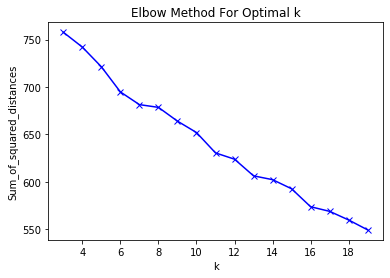

In [17]:
# exploratory analysis with k-value for the k-means clustering:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(DF['title'])

Sum_of_squared_distances = []
K = range(3,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

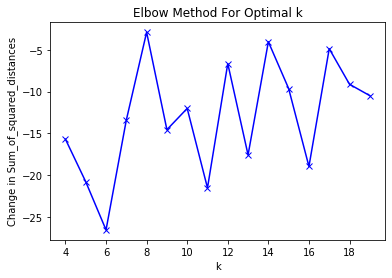

In [20]:
plt.plot(range(4,20), np.array(Sum_of_squared_distances[1:])-np.array(Sum_of_squared_distances[:-1]), 'bx-')
plt.xlabel('k')
plt.ylabel('Change in Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

[1 1 1 2 2 2 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 3 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 3 0 3 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3]


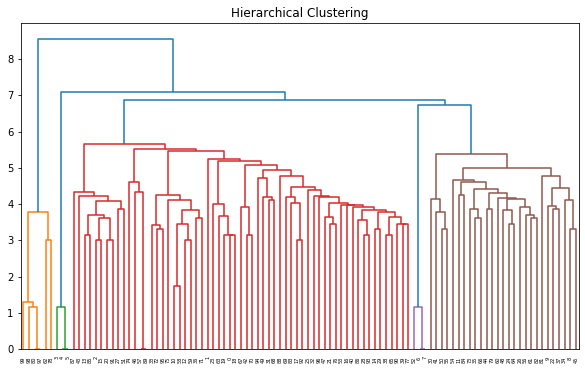

In [5]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering =model.fit(X.toarray())
clust_labels = clustering.labels_
print(clust_labels)


plt.figure(figsize = (10,6))
plt.title('Hierarchical Clustering')
dendro = hc.dendrogram((hc.linkage(X.toarray(), method ='ward')))

In [6]:
def Kmeans_clustering(DF, k, cluster_using = 'content'):
    # kmeans clustering using given k, 
    # cluster based on one-hot representation of the given feature cluster_using
    true_k = k
    model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 200, n_init = 10)   
    X = TfidfVectorizer(stop_words = 'english').fit_transform(DF[cluster_using])
    model.fit(X)
    labels=model.labels_
    wiki_cl=pd.DataFrame(list(zip(DF['title'],labels)), columns=['title','cluster'])
    print(wiki_cl.sort_values(by=['cluster']))
    
    # generate wordcloud from each cluster
    result = {'cluster':labels,'wiki':DF['title']}
    result = pd.DataFrame(result)
    for k in range(0,true_k):
       s = result[result.cluster == k]
       text = s['wiki'].str.cat(sep = ' ')
       text = text.lower()
       text = ' '.join([word for word in text.split()])
       wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)
       print('Cluster: {}'.format(k))
       print('Titles')
       titles = wiki_cl[wiki_cl.cluster == k]['title']         
       # print(titles.to_string(index=False))
       plt.figure()
       plt.imshow(wordcloud, interpolation = "bilinear")
       plt.axis("off")
       plt.show()

                                                title  cluster
21  aren’t big bike firms tracking environmental i...        0
54  exclusive california bay area regulators probe...        0
56  factbox pros cons el salvador first bitcoin na...        0
34  air new zealand studying add low emissions pla...        0
61  german auto giants place bets hydrogen cars re...        0
..                                                ...      ...
69  limit warming 1 5ºc huge amounts fossil fuels ...        5
59             climate change india live without coal        5
24  vitol plans electric hybrid bunker tankers sin...        5
40  startup keeps co2 air injecting ‘bio oil’ unde...        5
71  building blocks needed prevent climate catastr...        5

[100 rows x 2 columns]
Cluster: 0
Titles


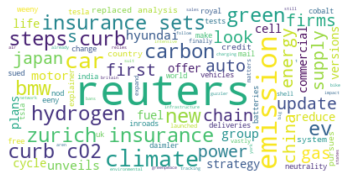

Cluster: 1
Titles


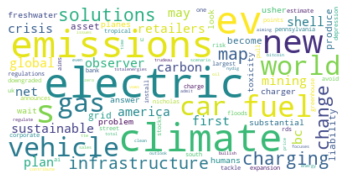

Cluster: 2
Titles


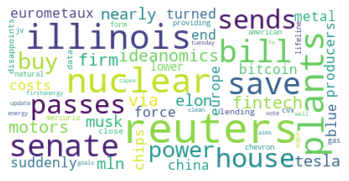

Cluster: 3
Titles


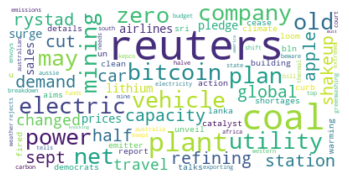

Cluster: 4
Titles


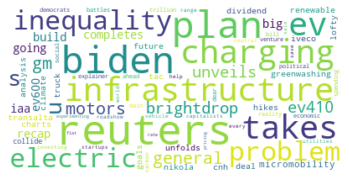

Cluster: 5
Titles


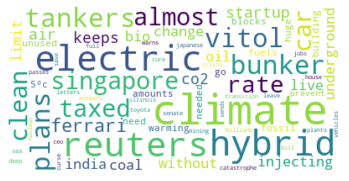

In [7]:
Kmeans_clustering(DF, 6, cluster_using = 'content')

                                                title  cluster
53  watchdog launch crackdown ads falsely claiming...        0
31  new york bans gas guzzler sales 2035 — states ...        0
16      royal mail tests eeny weeny evs uk deliveries        0
15  electric vehicles usher new pennsylvania regul...        0
0   ev charging solutions become asset liability grid        1
..                                                ...      ...
83  dear venture capitalists help save world — inv...       10
72       gas crisis leaves europe searching solutions       10
96  auto stock roundup aap xpev q2 results f outpu...       10
2   electric vehicles produce substantial toxicity...       10
18  shell rds announces plans ev charging expansio...       10

[100 rows x 2 columns]
Cluster: 0
Titles


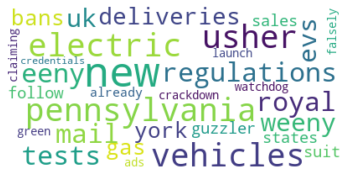

Cluster: 1
Titles


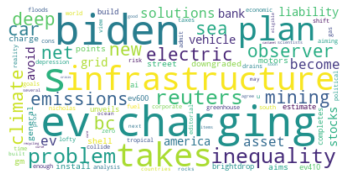

Cluster: 2
Titles


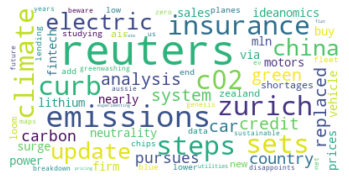

Cluster: 3
Titles


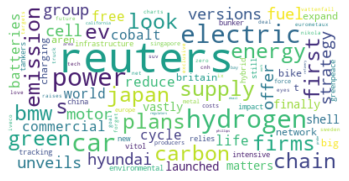

Cluster: 4
Titles


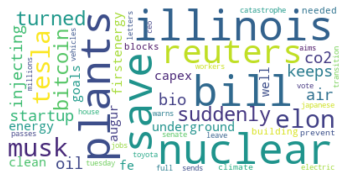

Cluster: 5
Titles


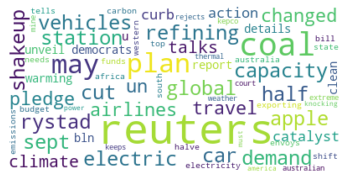

Cluster: 6
Titles


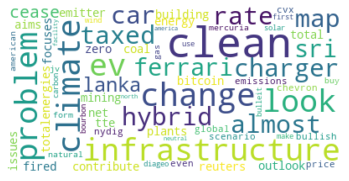

Cluster: 7
Titles


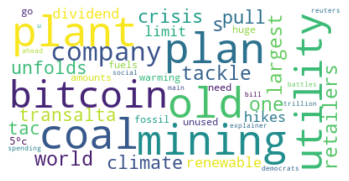

Cluster: 8
Titles


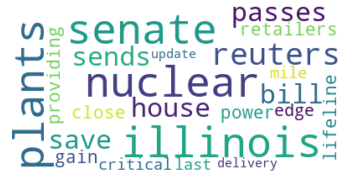

Cluster: 9
Titles


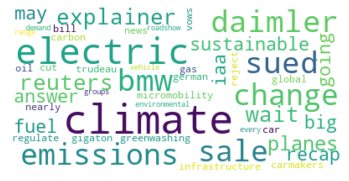

Cluster: 10
Titles


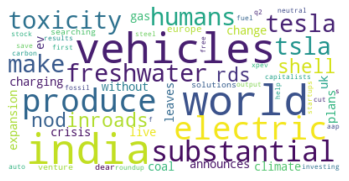

In [21]:
Kmeans_clustering(DF, 11, cluster_using = 'content')

                                                title  cluster
57      old coal plant mining bitcoin utility company        0
33  one world’s largest retailers plan tackle clim...        0
89      old coal plant mining bitcoin utility company        0
43  forget looks love tech 83 200 bmw ix electric suv        0
69  limit warming 1 5ºc huge amounts fossil fuels ...        0
..                                                ...      ...
18  shell rds announces plans ev charging expansio...       14
74  observer view pros cons deep sea mining observ...       15
67  zacks analyst blog highlights alliant energy e...       15
87  toyota ceo warns full transition electric vehi...       15
86  next car may built ocean rocks scientists agre...       15

[100 rows x 2 columns]
Cluster: 0
Titles


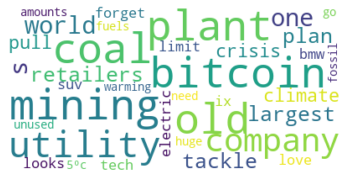

Cluster: 1
Titles


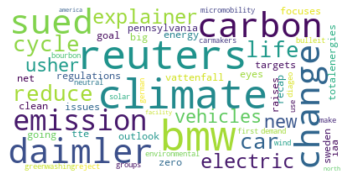

Cluster: 2
Titles


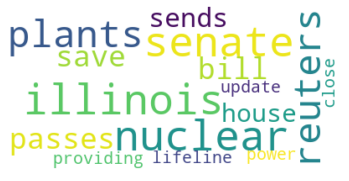

Cluster: 3
Titles


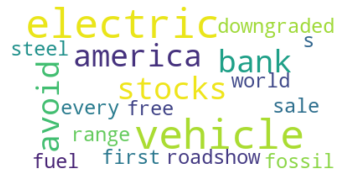

Cluster: 4
Titles


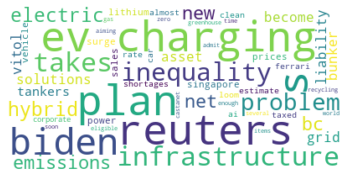

Cluster: 5
Titles


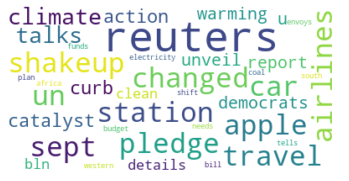

Cluster: 6
Titles


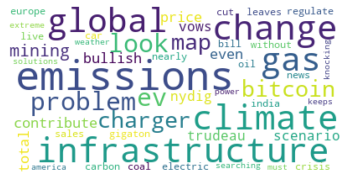

Cluster: 7
Titles


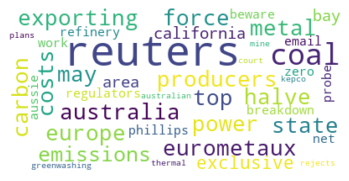

Cluster: 8
Titles


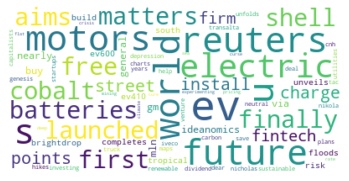

Cluster: 9
Titles


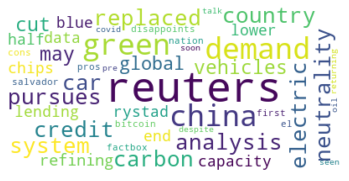

Cluster: 10
Titles


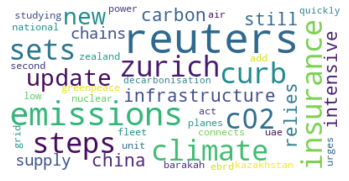

Cluster: 11
Titles


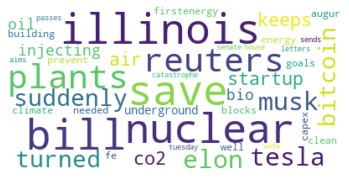

Cluster: 12
Titles


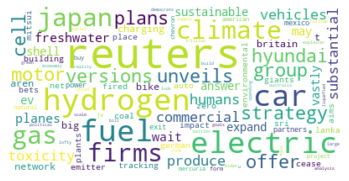

Cluster: 13
Titles


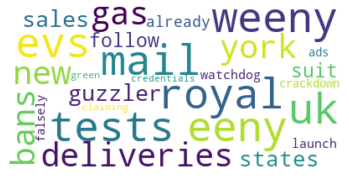

Cluster: 14
Titles


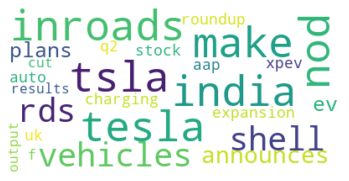

Cluster: 15
Titles


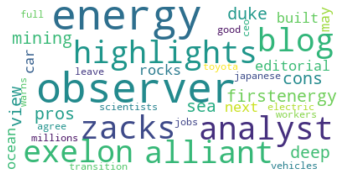

In [22]:
Kmeans_clustering(DF, 16, cluster_using = 'content')

Below is the implementation of the gap statistic calculation from the following source: 
https://gist.github.com/michiexile/5635273

In [53]:
def DBSCAN_results(DF):
    X = CountVectorizer(stop_words = 'english').fit_transform(DF['content'])
    X = X.toarray()
    model = DBSCAN(eps = 0.5, min_samples = 2, metric = 'cosine').fit(X)
    labels=model.labels_
    print(labels)
    wiki_cl=pd.DataFrame(list(zip(DF['title'],labels)), columns=['title','cluster'])
    print(wiki_cl.sort_values(by=['cluster']))
    
    # generate wordcloud from each cluster
    result = {'cluster':labels,'wiki':DF['title']}
    result = pd.DataFrame(result)
    true_k = 7
    for k in range(0,true_k):
       s = result[result.cluster == k]
       text = s['wiki'].str.cat(sep = ' ')
       text = text.lower()
       text = ' '.join([word for word in text.split()])
       wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)
       print('Cluster: {}'.format(k))
       print('Titles')
       titles = wiki_cl[wiki_cl.cluster == k]['title']         
       # print(titles.to_string(index=False))
       plt.figure()
       plt.imshow(wordcloud, interpolation = "bilinear")
       plt.axis("off")
       plt.show()

[-1 -1 -1  0  0 -1  1  1 -1 -1  2 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1  5  2 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1
 -1 -1  6  6]
                                                title  cluster
0   ev charging solutions become asset liability grid       -1
71  building blocks needed prevent climate catastr...       -1
70  firstenergy fe capex clean energy goals augur ...       -1
69  limit warming 1 5ºc huge amounts fossil fuels ...       -1
68  chevron cvx mercuria form jv buy american natu...       -1
..                                                ...      ...
89      old coal plant mining bitcoin utility company        5
57      old coal plant mining bitcoin utility company        5
98  illinois senate passes bill save nuclear plant...        6
80  illinois senate passes bill save nuclear plant...        6
9

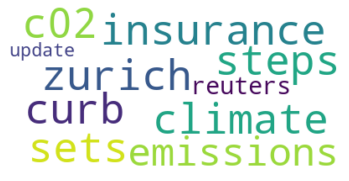

Cluster: 1
Titles


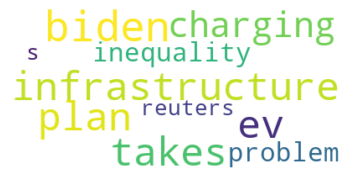

Cluster: 2
Titles


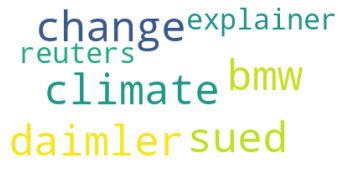

Cluster: 3
Titles


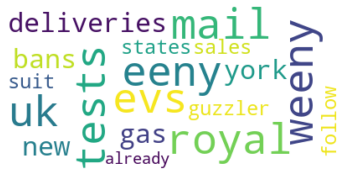

Cluster: 4
Titles


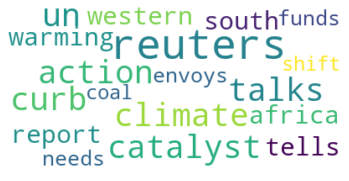

Cluster: 5
Titles


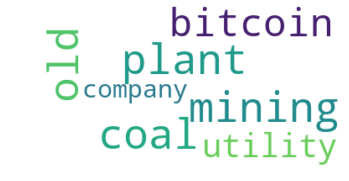

Cluster: 6
Titles


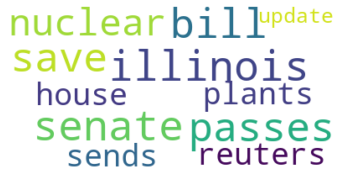

In [54]:
DBSCAN_results(DF)